In [1]:
from __future__ import division
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
#import seaborn as sns
#sns.set()
pd.options.display.max_colwidth = 128
pylab.rcParams['figure.figsize'] = 12, 5
# d = pd.read_csv('...', parse_dates=['date'])
# pd.to_datetime(d['timestamp'], unit='s')
# with mpl.rc_context({"figure.figsize": (5, 5)}):
# with mpl.rc_context({"lines.linewidth": 2, "lines.color": "r"}):
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# ax.set_xlabel('x label')


Populating the interactive namespace from numpy and matplotlib


In [2]:
from skyfield import api
ts = api.load.timescale()

In [3]:
import numpy as np
import skyfield.functions as f
from skyfield.constants import tau as 𝜏
from skyfield.nutationlib import build_nutation_matrix

In [4]:
latlon = np.array([
    (1.0, lat, lon)
    for lat in range(-89, 90)
    for lon in range(0, 360)
])
latlon[1] *= 𝜏 / 360.0
latlon[2] *= 𝜏 / 360.0

v = f.from_spherical(*latlon.T)

In [5]:
for mean_obliquity, true_obliquity, psi in [
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1),
    (-1, 0, 0),
    (0, -1, 0),
    (0, 0, -1),
    (10, -10, 10),
    ]:
    R = build_nutation_matrix(mean_obliquity * 𝜏 / 360.0,
                              true_obliquity * 𝜏 / 360.0,
                              psi * 𝜏 / 360.0)
    v2 = f.mxv(R, v)
    #print(R)
    biggest_move = f.angle_between(v, v2).max() / 𝜏 * 360.0
    print('{:3.0f} {:3.0f} {:3.0f} {:6.2f}'.format(
        mean_obliquity, true_obliquity, psi, biggest_move))

  1   0   0   1.00
  0   1   0   1.00
  0   0   1   1.00
 -1   0   0   1.00
  0  -1   0   1.00
  0   0  -1   1.00
 10 -10  10  22.34


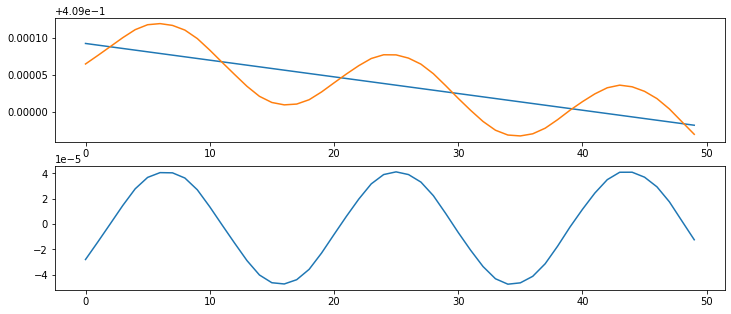

In [6]:
t = ts.utc(range(2000, 2050))
d_psi, d_eps = t._nutation_angles_radians
mean_obliquity = t._mean_obliquity_radians
true_obliquity = mean_obliquity + d_eps

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(mean_obliquity)
ax1.plot(true_obliquity)
ax2.plot(d_eps)

In [ ]:
from skyfield.nutationlib import iau2000b_radians

t2000a = ts.J(np.arange(1995, 2050, 0.1))
t2000b = t2000a[:]
print(t2000a.shape)
print(t2000b.shape)

t2000b._nutation_angles_radians = iau2000b_radians(t2000b)

vt = v[:,None,:]

R = t2000a.N[:,:,:,None]
R.shape
v2000a = f.mxv(R, vt)

R = t2000b.N[:,:,:,None]
v2000b = f.mxv(R, vt)

difference = f.angle_between(v2000a, v2000b)
max_diff = difference.max(axis=1)
max_diff.shape
#vt.shape

mas = lambda rad: rad / 𝜏 * 360.0 * 3600.0 * 1e3

fig, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(t2000a.J, mas(
    t2000a._nutation_angles_radians[0]
    - t2000b._nutation_angles_radians[0]
))
ax2.plot(t2000a.J, mas(
    t2000a._nutation_angles_radians[1]
    - t2000b._nutation_angles_radians[1]
))
ax3.plot(t2000a.J, mas(max_diff))

(550,)
(550,)
